<a href="https://colab.research.google.com/github/eldy1anse/Sistema-de-Predicci-n-de-Salud-Mental-en-Estudiantes/blob/main/Proyecto_Salud_Mental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
data = pd.read_csv('Student Mental health.csv')
data


,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


**PREPOCESAMIENTO**

In [ ]:
data = data.dropna()


In [ ]:
# Eliminamos la columna Date ya que en este caso no sera util para el analisis que se desea desarrollar
data = data.drop(['Timestamp'], axis = 1)


In [ ]:
# Cambiar nombres columnas
data_new = { 'Choose your gender': 'Genero',
                       'Age': 'Edad',
                       'What is your course?': 'Carrera',
                       'Your current year of Study': 'Año de estudio',
                       'What is your CGPA?': 'CGPA',
                       'Marital status': 'Tiene pareja?',
                       'Do you have Depression?': 'Depresion',
                       'Do you have Anxiety?': 'Ansiedad',
                       'Do you have Panic attack?': 'Ataque de panico',
                       'Did you seek any specialist for a treatment?': 'Buscó un medico?'}

data.rename(columns=data_new, inplace=True)


In [ ]:
data


,Genero,Edad,Carrera,Año de estudio,CGPA,Tiene pareja?,Depresion,Ansiedad,Ataque de panico,Buscó un medico?
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...
96,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


In [ ]:
print(data.columns)


Index(['Genero', 'Edad', 'Carrera', 'Año de estudio', 'CGPA', 'Tiene pareja?',
       'Depresion', 'Ansiedad', 'Ataque de panico', 'Buscó un medico?'],
      dtype='object')


In [ ]:
# Agrupar carreras para evitar ruido en el código
data['Carrera'] = data['Carrera'].replace({
    'Engineering': 'Engineering',
    'Islamic education': 'Islamic Education',
    'BIT': 'Computer Science',
    'Laws': 'Law',
    'Pendidikan islam': 'Islamic Education',
    'BCS': 'Computer Science',
    'Irkhs': 'Others',
    'Psychology': 'Medical',
    'KENMS': 'Others',
    'Accounting ': 'Finance',
    'ENM': 'Others',
    'KOE': 'Others',
    'Banking Studies': 'Finance',
    'Business Administration': 'Finance',
    'KIRKHS': 'Others',
    'Usuluddin ': 'Islamic Studies',
    'TAASL': 'Others',
    'Engine': 'Engineering',
    'ALA': 'Others',
    'Biomedical science': 'Medical',
    'koe': 'Others',
    'Kirkhs': 'Others',
    'BENL': 'Others',
    'Benl': 'Others',
    'IT': 'Computer Science',
    'CTS': 'Computer Science',
    'Biotechnology': 'Medical',
    'engin': 'Engineering',
    'Econs': 'Finance',
    'MHSC': 'Others',
    'Malcom': 'Others',
    'Kop': 'Others',
    'Biotechnology': 'Medical',
    'Communication ': 'Computer Science',
    'Diploma Nursing': 'Medical',
    'Pendidikan Islam ': 'Islamic Education',
    'Radiography': 'Medical',
    'psychology': 'Medical',
    'Fiqh fatwa ': 'Islamic Education',
    'DIPLOMA TESL': 'Others',
    'Koe': 'Others',
    'Fiqh': 'Islamic Education',
    'Nursing ': 'Medical',
    'Pendidikan Islam': 'Others',
    'Human Sciences ': 'Others',
    'Mathemathics': 'Others'
})

In [ ]:
data['Carrera'].unique()

array(['Engineering', 'Islamic Education', 'Computer Science', 'Law',
       'Others', 'Human Resources', 'Medical', 'Finance',
       'Marine science', 'Islamic Studies'], dtype=object)

In [ ]:
# Agrupar Años de estudio para evitar ruido
data['Año de estudio'].replace({'year 1': 'year 1', 'year 2': 'year 2', 'Year 1': 'year 1', 'year 3': 'year 3', 'year 4': 'year 4', 'Year 2': 'year 2',
       'Year 3': 'year 3'}, inplace = True)

In [ ]:
data['Año de estudio'].unique()


array(['year 1', 'year 2', 'year 3', 'year 4'], dtype=object)

In [ ]:
# Convertir CGPA a valores numéricos
def convertir_rango_a_promedio(rango):
    """Convierte un rango en un valor promedio o devuelve el valor si ya es numérico"""
    if isinstance(rango, str):
        # Si es una cadena de texto, convertir el rango
        partes = rango.split(' - ')
        return (float(partes[0]) + float(partes[1])) / 2
    return float(rango)  # Si ya es un número, devolverlo como está

data['CGPA'] = data['CGPA'].apply(convertir_rango_a_promedio)


In [ ]:
# Definir características y etiquetas
X = data.drop(['Depresion', 'Ansiedad', 'Ataque de panico'], axis=1)
y_depresion = data['Depresion'].map({'Yes': 1, 'No': 0})
y_ansiedad = data['Ansiedad'].map({'Yes': 1, 'No': 0})
y_panico = data['Ataque de panico'].map({'Yes': 1, 'No': 0})

In [ ]:
# Codificación de variables categóricas
categorical_features = ['Genero', 'Carrera', 'Año de estudio', 'Tiene pareja?']
numerical_features = ['Edad', 'CGPA']

In [ ]:
# Preprocesamiento de datos
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

In [ ]:
# Crear pipeline para el modelo
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))])

In [ ]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_depresion, test_size=0.2, random_state=42)


In [ ]:
# Entrenar el modelo
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Edad', 'CGPA']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Genero', 'Carrera',
                                                   'Año de estudio',
                                                   'Tiene pareja?'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [ ]:
# Predecir en el conjunto de prueba
y_pred = clf.predict(X_test)

In [ ]:
# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.73      0.79        15
           1       0.43      0.60      0.50         5

    accuracy                           0.70        20
   macro avg       0.64      0.67      0.64        20
weighted avg       0.74      0.70      0.71        20


Confusion Matrix:
 [[11  4]
 [ 2  3]]


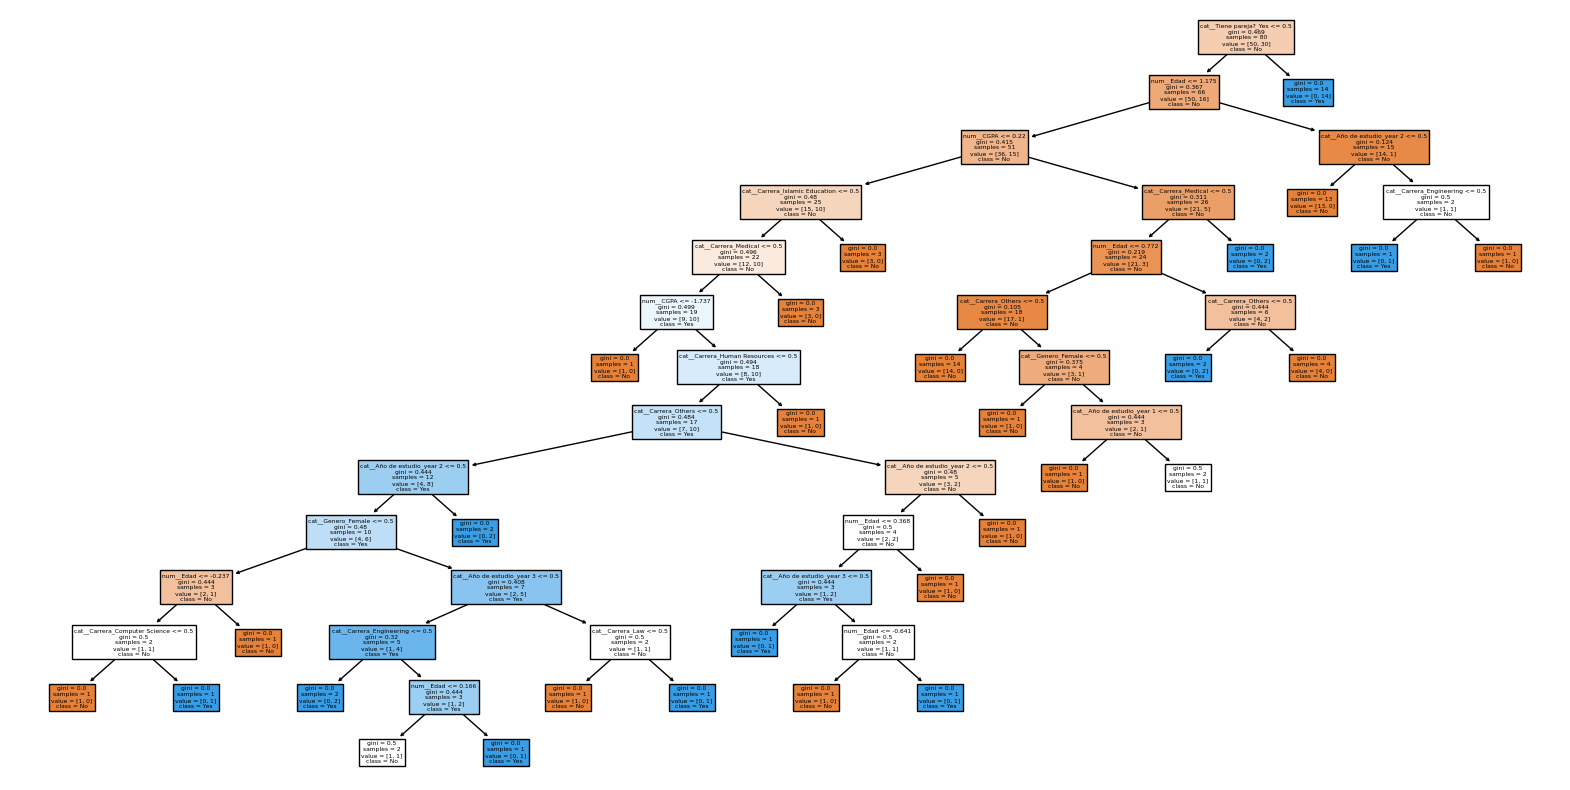

In [ ]:
# Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(clf.named_steps['classifier'], feature_names=preprocessor.get_feature_names_out(), class_names=['No', 'Yes'], filled=True)
plt.show()